# Assignment: Libraries

This problem set aims to develop your ability to use non-standard libraries such as NumPy, Pandas, Matplotlib, and requests.  

Please follow all instructions precisely.

## Prerequisite: Instal libraries

To do this assignment, you need to have a few libraries installed. You already know how to instal libraries in a basic Python virtual environment. In Anaconda, it is even easier.  

Instal the following libraries:
1. Pandas
2. Requests
3. Matplotlib

Follow this tutorial to instal external libraries for your Jupyter notebook using the Anaconda Navigator.  

https://www.tutorialspoint.com/add-packages-to-anaconda-environment-in-python  

Once you are done, run the following cell. If it does nothing (i.e., if it throws no errors), then you may proceed.

In [1]:
# NON-EDITABLE CODE CELL
# You may run this cell, but do not edit it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## Note

1. There is a good chance that you will have to look up how to do things using these libraries. This is fine. Just credit your sources appropriately.


## Problem 1: Association Rules

### Context

You are a data consultant for a medium-sized grocery. Your job is to help the grocery's marketing and sales team identify the most frequent purchases of customers.  

### 1.1

Read the file `sample order basket.csv` into a Pandas DataFrame called `df`.

In [1]:
import numpy as np
import pandas as pd

# Download file sample order basket.csv
# Load csv file to dataframe
# Assign file name to filename variable

filename = 'sample order basket.csv'

# Load to dataframe
df = pd.read_csv(filename)

# Read the file 'sample order basket.csv' into a Pandas DataFrame called df
df

,OrderNum,Product
0,1000,eggs
1,1001,bread
2,1002,eggs
3,1002,bread
4,1002,flour
...,...,...
1068,1496,bread
1069,1497,jam
1070,1498,bread
1071,1499,eggs


### 1.2

Create a "binary table" using a Pandas DataFrame. Save the DataFrame in a variable called `binary_table`.  

The specifications of the binary table are as follows:
1. The data in the binary table is based on the order log contained in `df`.
2. The index values of the binary table are the unique order IDs contained in the sales logs. These are arranged in ascending numerical order. Format the values as `int64`.
3. The column values of the binary table are the unique products contained in the sales logs. These are arranged in alphabetical order. Format the values as `object`.
4. The values of the binary table are either 0 or 1. A value will be 1 if the respective product is present in the respective order, and it will be 0 if the respective product is not present in the respective order. So, for example: if Order 5 ordered an apple, then the cell at row 5, column apple will have the value 1, and every other cell at row 5 will have the value 0.

In [2]:
import numpy as np
import pandas as pd

unique_order_number = sorted(df['OrderNum'].unique()) # arranges unique OrderNum in ascending order
# print(df['OrderNum'].unique().dtype) --> int64

unique_products = sorted(df['Product'].unique()) # alphabetises unique Products
# print(df['Product'].unique().dtype) --> object


list_of_all_orders = list() # Create a new list list_of_all_orders
for every_order_number in unique_order_number: # Get every_order_number in unique_order_number
    set_of_all_orders = dict() # Create a new set set_of_all_orders
    set_of_all_orders.setdefault('OrderNum', 'Product') # Insert the key OrderNum with the value Product to set_of_all_orders
    set_of_all_orders['OrderNum'] = every_order_number # Assign every_order_number under the OrderNum category of set_of_all_orders
    log_of_all_order_numbers = df.loc[df['OrderNum'] == every_order_number, : ] # Assign order_num_log as the rows containing OrderNum
    log_of_products = sorted(np.array(log_of_all_order_numbers['Product'])) # Sort the elements of log_of_all_order_numbers['Product'] in an array
    set_of_all_orders['Product'] = log_of_products # Assign log_of_products under the Product category of set_of_all_orders
    list_of_all_orders.append(set_of_all_orders) # Append set_of_all_orders to list_of_all_orders

binary_table = pd.DataFrame(list_of_all_orders) # binary_table now contains the list_of_all_orders by OrderNum
binary_table[unique_products] = 0 # Create new columns (each column will have the title of every unique_products)

for every_order_number in range(len(binary_table['OrderNum'])):
    for every_product in range(len(binary_table.loc[every_order_number, 'Product'])):
        list_of_all_products_of_all_order_numbers = binary_table.loc[every_order_number, 'Product'] # list_of_all_products_of_all_order_numbers is a list that contains all the products ordered under OrderNum
        list_of_all_products_of_every_order_number = list_of_all_products_of_all_order_numbers[every_product] # Gets every_product ordered under OrderNum
        for every_vertical_line in range(2, len(binary_table.columns), 1):
            if binary_table.at[every_order_number, binary_table.columns[every_vertical_line]] == 1: # If the OrderNum appears again in the succeeding row in the sample order basket.csv file
                continue # Goes back to the for loop (indented with two tabs)
            elif list_of_all_products_of_every_order_number == binary_table.columns[every_vertical_line]: # If the product was ordered by OrderNum,
                binary_table.at[every_order_number, binary_table.columns[every_vertical_line]] = 1 # Assign 1 to the count of the product ordered
            else: # Else, the product was not ordered by OrderNum
                binary_table.at[every_order_number, binary_table.columns[every_vertical_line]] = 0 # Assign 0 to the count of the products that we not ordered

binary_table.drop(['Product'], axis = 1, inplace = True) # Drop the specific labels of Product to binary_table with an axis of 1 and inplace as True (standards of the table)
             
binary_table # Display binary_table

,OrderNum,bread,cheese,eggs,flour,jam
0,1000,0,0,1,0,0
1,1001,1,0,0,0,0
2,1002,1,0,1,1,0
3,1003,1,0,1,0,1
4,1004,0,0,1,0,0
...,...,...,...,...,...,...
495,1495,1,0,1,1,0
496,1496,1,1,1,0,0
497,1497,0,0,0,0,1
498,1498,1,0,0,0,0


### 1.3

Using `binary_table`, create a report. Store this report in a Pandas DataFrame called `report`.  

The specifications of the report are as follows:
1. The data in the report is based on the data in `binary_table`.
2. The index values of `report` are simply the defaults (i.e., counting up from 0 to whatever number).
3. `report` has two columns: `combination` and `count`. The `combination` column will contain tuples that describe an order combination (e.g., ("apple", "eggplant")). Format the `combination` column as `object`. The `count` column will contain an integer value describing the number of times that this combination appeared in the list of orders. Format the `count` column as `int64`.
4. Sort `reports` by `count` in descending order. The order of combinations within each count bracket does not matter.

You may use any standard library from Python 3.8 that you feel is necessary to complete this item. (This just means that you can use any standard Python library as long as it was in Python 3.8).

In [13]:
import numpy as np
import pandas as pd

unique_order_number = sorted(df['OrderNum'].unique()) # arranges unique OrderNum in ascending order
# print(df['OrderNum'].unique().dtype) --> int64

unique_products = sorted(df['Product'].unique()) # alphabetises unique Products
# print(df['Product'].unique().dtype) --> object


list_of_all_orders = list() # Create a new list list_of_all_orders
for every_order_number in unique_order_number: # Get every_order_number in unique_order_number
    set_of_all_orders = dict() # Create a new set set_of_all_orders
    set_of_all_orders.setdefault('OrderNum', 'Product') # Insert the key OrderNum with the value Product to set_of_all_orders
    set_of_all_orders['OrderNum'] = every_order_number # Assign every_order_number under the OrderNum category of set_of_all_orders
    log_of_all_order_numbers = df.loc[df['OrderNum'] == every_order_number, : ] # Assign order_num_log as the rows containing OrderNum
    log_of_products = sorted(np.array(log_of_all_order_numbers['Product'])) # Sort the elements of log_of_all_order_numbers['Product'] in an array
    set_of_all_orders['Product'] = log_of_products # Assign log_of_products under the Product category of set_of_all_orders
    list_of_all_orders.append(set_of_all_orders) # Append set_of_all_orders to list_of_all_orders

set_containing_all_the_reports = dict() # Create a new set report_set
for every_order in list_of_all_orders: # every_order that is part of list_of_all_orders
    every_order = tuple(every_order['Product']) # set every_order as a tuple containing the Product of every_order
    if every_order in set_containing_all_the_reports.keys(): # if every_order is a key within report_list
        set_containing_all_the_reports[every_order] += 1 # Increment every_order within report_list by 1.
    else:
        set_containing_all_the_reports[every_order] = 1 # Set every_order within report_list by 1
        
# set_containing_all_the_reports is a set containing every_order with the count of the number of times every 'group of orders' was ordered
        
list_of_all_combinations_and_count_of_each = list() # Create a new list list_of_all_combinations_and_count_of_each
for every_combination in set_containing_all_the_reports: # every_combination within set_containing_all_the_reports
    dictionary_of_order_combinations = dict() # Create a new dictionary named dictionary_of_order_combinations
    dictionary_of_order_combinations['combination'] = every_combination # assign every_combination to the combination of dictionary_of_order_combinations
    dictionary_of_order_combinations['count'] = int(set_containing_all_the_reports[every_combination]) # dictionary_of_order_combinations['count'] is every_combination of set_containing_all_the_reports as an integer
    list_of_all_combinations_and_count_of_each.append(dictionary_of_order_combinations) # append dictionary_of_order_combinations to list_of_all_combinations_and_count_of_each
    
# list_of_all_combinations_and_count_of_each is a list containing every_combination with the count
    
report = pd.DataFrame(list_of_all_combinations_and_count_of_each, columns = ['combination', 'count']) # report is a DataFrame (Pandas) that contains list_of_all_combinations_and_count_of_each with columns entitled combination and count

report.sort_values(ascending = False, by = 'count') # report is in sort_values by the count in a descending order

,combination,count
1,"(bread,)",65
4,"(bread, jam)",57
10,"(bread, eggs)",47
3,"(bread, eggs, jam)",46
0,"(eggs,)",31
14,"(jam,)",26
2,"(bread, eggs, flour)",21
18,"(bread, flour, jam)",18
21,"(bread, cheese, eggs)",17
7,"(eggs, jam)",17


## Problem 2: A Plot of the International Space Station's Location

We will only be checking the final output of this problem. 

### Context

You are a budding data scientist aiming to try your new tools on real-world data. As a pet project, you have decided that you want to try plotting the latitude and longitude positions of the International Space Station on a chart.  

An "application programming interface" (API) is an interface (i.e., a point of connection/use) that a program offers to other pieces of software. APIs are how modern computer programs interact. To massively oversimplify the concept, modern applications send and receive HTTP requests and JSON-formatted data to talk to each other.  

We will be using the ISS position data API hosted at http://open-notify.org/Open-Notify-API/ISS-Location-Now/ for this item.  

You are expected to read the documentation of this API for this item.

### 2.1

Use the `requests` library and the `time` library to collect position data of the ISS at intervals of 10 seconds over the course of 30 minutes by sending GET requests to the ISS API endpoint.  

The specifications of this problem are as follows:
1. Send a GET request to the ISS API endpoint once every 10 seconds for 30 minutes. 
2. Each time you send a GET request, append the returned data to a list called `iss_data`.
3. Save all the data to a file called `iss-data.json` so that you do not lose it. You may do this every time you get a request if you wish.
4. Do not modify the returned data per GET request.  
5. The final file `iss-data.json` should contain roughly 180 data points.

We will not be strict about the time intervals. We will only look at the chart that you produce from your data.

In [1]:
# Type 'pip install schedule' on jupyter_mac.command
import schedule
import time
import requests
import json

iss_data = [] # Create a new list entitled iss_data
time_in_seconds = 0 # Equate time_in_seconds to nil
    
while time_in_seconds <= (30 * 60): # Whilst time_in_seconds is less than or equal to 1800 seconds (30 minutes)
    def get_iss_data(): # get_iss_data function
        data = requests.get('http://api.open-notify.org/iss-now.json').json() # Get request from the json file
        iss_data.append(data) # append data into iss_data list
        with open('iss-data.json','w') as json_file: # write a json file
            json.dump(iss_data, json_file) # dumps iss_data into json_file
        return schedule.CancelJob 
    schedule.every(10).seconds.do(get_iss_data) # Every 10 seconds, do the commands in get_iss_data
    schedule.run_pending() # Run all jobs that are scheduled to run
    time.sleep(10) # Delays the process in get_iss_data by 10 seconds
    time_in_seconds += 10 # Add 10 to time_in_seconds
    
# Reference 1: https://www.youtube.com/watch?v=zwIGxcDxS5o
# Reference 2: https://schedule.readthedocs.io/en/stable/examples.html#run-a-job-once

### 2.2

Using the data you gathered and stored in `iss-data.json`, make a `matplotlib` plot of the location data.  

The specifications of this problem are as follows: 
1. Use the longitude and latitude data contained in `iss-data.json` as your data.
2. Plot this data on a `matplotlib` plot that appropriately visualizes the data. It is up to you what specific plot you want to use as long as we, the human readers of your report, understand the message of your plot.
3. Use latitude as the X axis and longitude as the Y axis.  
4. VERY IMPORTANT: Make sure that the chart displays in your Jupyter notebook before you submit.  

We will only check the chart. We do not care how you make it display as long as you follow the specifications.

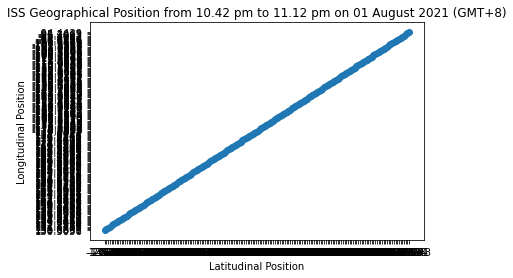

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open('iss-data.json', 'r') as json_file:
    json_data = json.loads(json_file.read()) # read the json_data from json_file and load it as a string

iss_location_longitude = [dictionary['iss_position']['longitude'] for dictionary in json_data] # Assign iss_location_longitude to get every longitude under the iss_position from the json_file 
iss_location_latitude = [dictionary['iss_position']['latitude'] for dictionary in json_data] # Assign iss_location_latitude to get every atitude under the iss_position from the json_file 

plt.scatter(iss_location_latitude, iss_location_longitude) # Use a scatter plot to determine the iss_location_latitude (x-axis) and iss_location_longitude (y-axis) on the graph
plt.title('ISS Geographical Position from 10.42 pm to 11.12 pm on 01 August 2021 (GMT+8)') # title of the scatter plot graph
plt.xlabel('Latitudinal Position') # x-axis title
plt.ylabel('Longitudinal Position') # y-axis title
plt.show() # Show the scatter plot